# Here we import the needed packages 

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
df=pd.read_csv('train.csv')

M:\anacon\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Get to Know our data

In [3]:
df.head(n=2)

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147


In [4]:
df.tail(n=2)

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
903651,Social,20170104,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",2709355455991750775,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",2709355455991750775_1483592857,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""24"", ""pageviews"": ""22...","{""referralPath"": ""/l.php"", ""campaign"": ""(not s...",1483592857,1,1483592864
903652,Social,20170104,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",814900163617805053,"{""continent"": ""Americas"", ""subContinent"": ""Cen...",0814900163617805053_1483574474,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""31"", ""pageviews"": ""31...","{""referralPath"": ""/yt/about/es-419/"", ""campaig...",1483574474,1,1483574474


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 12 columns):
channelGrouping         903653 non-null object
date                    903653 non-null int64
device                  903653 non-null object
fullVisitorId           903653 non-null object
geoNetwork              903653 non-null object
sessionId               903653 non-null object
socialEngagementType    903653 non-null object
totals                  903653 non-null object
trafficSource           903653 non-null object
visitId                 903653 non-null int64
visitNumber             903653 non-null int64
visitStartTime          903653 non-null int64
dtypes: int64(4), object(8)
memory usage: 82.7+ MB


In [6]:
list(df.columns.values)

['channelGrouping',
 'date',
 'device',
 'fullVisitorId',
 'geoNetwork',
 'sessionId',
 'socialEngagementType',
 'totals',
 'trafficSource',
 'visitId',
 'visitNumber',
 'visitStartTime']

In [7]:
df.describe()

,date,visitId,visitNumber,visitStartTime
count,9.036530e+05,9.036530e+05,903653.000000,9.036530e+05
mean,2.016589e+07,1.485007e+09,2.264897,1.485007e+09
std,4.697698e+03,9.022124e+06,9.283735,9.022124e+06
min,2.016080e+07,1.470035e+09,1.000000,1.470035e+09
25%,2.016103e+07,1.477561e+09,1.000000,1.477561e+09
50%,2.017011e+07,1.483949e+09,1.000000,1.483949e+09
75%,2.017042e+07,1.492759e+09,1.000000,1.492759e+09
max,2.017080e+07,1.501657e+09,395.000000,1.501657e+09


# change date and visit start time features into proper datetime form

In [8]:
date=pd.to_datetime(df['date'], format='%Y%m%d')


In [9]:
date.head(n=5)

0   2016-09-02
1   2016-09-02
2   2016-09-02
3   2016-09-02
4   2016-09-02
Name: date, dtype: datetime64[ns]

In [10]:
StartTime=pd.to_datetime(df['visitStartTime'], unit='s')

In [11]:
StartTime.head(n=5)

0   2016-09-02 15:33:05
1   2016-09-03 05:22:27
2   2016-09-03 01:16:26
3   2016-09-03 05:40:13
4   2016-09-02 13:23:20
Name: visitStartTime, dtype: datetime64[ns]

# explore "device" variable and its embeded features 

In [12]:
device_list = df.device.apply(json.loads).tolist()
device_keys = []

for i in device_list:
   for j in list(i.keys()):
       if(j not in device_keys):
           device_keys.append(j)


In [13]:
device_keys

['browser',
 'browserVersion',
 'browserSize',
 'operatingSystem',
 'operatingSystemVersion',
 'isMobile',
 'mobileDeviceBranding',
 'mobileDeviceModel',
 'mobileInputSelector',
 'mobileDeviceInfo',
 'mobileDeviceMarketingName',
 'flashVersion',
 'language',
 'screenColors',
 'screenResolution',
 'deviceCategory']

In [14]:
pd.DataFrame(df.device.apply(json.loads).tolist()).head()

,browser,browserSize,browserVersion,deviceCategory,flashVersion,isMobile,language,mobileDeviceBranding,mobileDeviceInfo,mobileDeviceMarketingName,mobileDeviceModel,mobileInputSelector,operatingSystem,operatingSystemVersion,screenColors,screenResolution
0,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset
1,Firefox,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,not available in demo dataset,not available in demo dataset
2,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset
3,UC Browser,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,not available in demo dataset,not available in demo dataset
4,Chrome,not available in demo dataset,not available in demo dataset,mobile,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,not available in demo dataset,not available in demo dataset


In [15]:
DVICE=pd.DataFrame(df.device.apply(json.loads).tolist())[["browser", "operatingSystem", "deviceCategory"]]

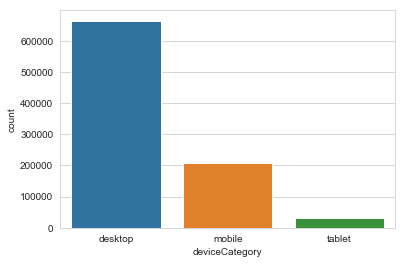

In [16]:
sns.countplot(DVICE['deviceCategory'])

In [17]:
DVICE.operatingSystem.value_counts()

Windows          350072
Macintosh        253938
Android          123892
iOS              107665
Linux             35034
Chrome OS         26337
(not set)          4695
Windows Phone      1216
Samsung             280
BlackBerry          218
Nintendo Wii        100
Firefox OS           89
Xbox                 66
Nintendo WiiU        35
FreeBSD               9
OpenBSD               2
Nokia                 2
SunOS                 1
Nintendo 3DS          1
NTT DoCoMo            1
Name: operatingSystem, dtype: int64

# explore "geoNetwork" variable and its embeded features 

In [18]:
geoNetwork_list = df.geoNetwork.apply(json.loads).tolist()
geoNetwork_keys = []

for i in geoNetwork_list:
   for j in list(i.keys()):
       if(j not in geoNetwork_keys):
           geoNetwork_keys.append(j)

In [19]:
geoNetwork_keys

['continent',
 'subContinent',
 'country',
 'region',
 'metro',
 'city',
 'cityId',
 'networkDomain',
 'latitude',
 'longitude',
 'networkLocation']

In [20]:
GEO=pd.DataFrame(df.geoNetwork.apply(json.loads).tolist())[['continent','subContinent', 'country', 'region', 'city','networkDomain']]

In [21]:
GEO.groupby(['continent','subContinent']).count()

country  region    city  networkDomain
continent subContinent                                              
(not set) (not set)              1468    1468    1468           1468
Africa    Eastern Africa         1927    1927    1927           1927
          Middle Africa           393     393     393            393
          Northern Africa        7683    7683    7683           7683
          Southern Africa        2169    2169    2169           2169
          Western Africa         2573    2573    2573           2573
Americas  Caribbean              2406    2406    2406           2406
          Central America       15583   15583   15583          15583
          Northern America     390657  390657  390657         390657
          South America         41731   41731   41731          41731
Asia      Central Asia           1215    1215    1215           1215
          Eastern Asia          46919   46919   46919          46919
          Southeast Asia        77800   77800   77800          77800
          Southern Asia         59321   59321   59321          59321
          Western Asia          38443   38443   38443          38443
Europe    Eastern Europe        45249   45249   45249          45249
          Northern Europe       58168   58168   58168          58168
          Southern Europe       35780   35780   35780          35780
          Western Europe        59114   59114   59114          59114
Oceania   Australasia           14893   14893   14893          14893
          Melanesia                81      81      81             81
          Micronesian Region       55      55      55             55
          Polynesia                25      25      25             25

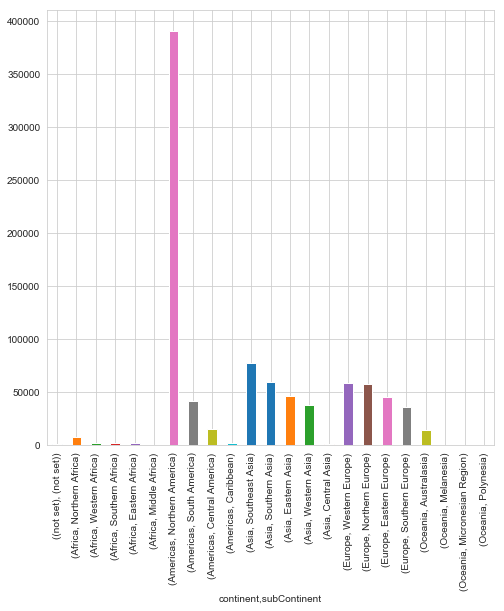

In [22]:
GEO.groupby('continent').subContinent.value_counts().plot(kind='bar',figsize=(8,8))



In [23]:
GEO.continent.value_counts()

Americas     450377
Asia         223698
Europe       198311
Oceania       15054
Africa        14745
(not set)      1468
Name: continent, dtype: int64

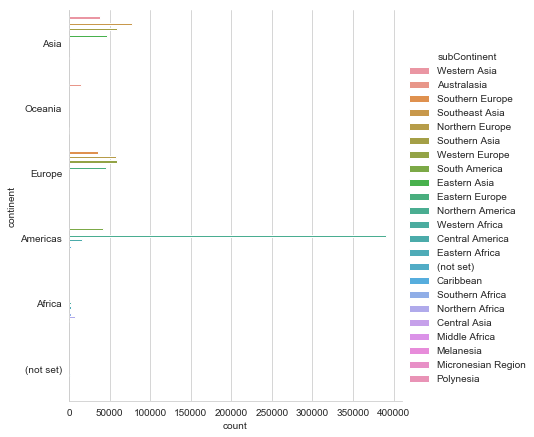

In [24]:

sns.catplot(kind="count",data=GEO, y='continent',hue='subContinent',height=6)

# explore "totals" variable and its embeded features 

In [25]:

totals_list = df.totals.apply(json.loads).tolist()
totals_keys = []

for i in totals_list:
   for j in list(i.keys()):
       if(j not in totals_keys):
           totals_keys.append(j)  

In [26]:
totals_keys

['visits', 'hits', 'pageviews', 'bounces', 'newVisits', 'transactionRevenue']

In [27]:
tot=pd.DataFrame(df.totals.apply(json.loads).tolist())[['visits', 'hits', 'pageviews', 'bounces', 'newVisits', 'transactionRevenue']]

In [28]:
tot.head()

,visits,hits,pageviews,bounces,newVisits,transactionRevenue
0,1,1,1,1,1,NaN
1,1,1,1,1,1,NaN
2,1,1,1,1,1,NaN
3,1,1,1,1,1,NaN
4,1,1,1,1,NaN,NaN


In [29]:
tot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 6 columns):
visits                903653 non-null object
hits                  903653 non-null object
pageviews             903553 non-null object
bounces               450630 non-null object
newVisits             703060 non-null object
transactionRevenue    11515 non-null object
dtypes: object(6)
memory usage: 41.4+ MB


In [30]:
tot['newVisits'].fillna(0, inplace=True)
tot['pageviews'].fillna(0, inplace=True)

tot['bounces'].fillna(0, inplace=True)
tot['transactionRevenue'].fillna('0', inplace=True)



In [31]:
tot['pageviews'] = tot['pageviews'] .astype(int)
tot['newVisits'] = tot['newVisits'] .astype(int)
tot['bounces'] = tot['bounces'].astype(int)
tot['visits'] = tot['visits'].astype(int)
tot['hits'] = tot['hits'].astype(int)
tot['transactionRevenue'] = tot['transactionRevenue'].astype(float)




In [32]:
tot.transactionRevenue[tot['transactionRevenue']>0].head()

752     37860000.0
753    306670000.0
799     68030000.0
802     26250000.0
859    574150000.0
Name: transactionRevenue, dtype: float64

# explore "trafficSource" variable and its embeded features 

In [33]:


trafficSource_list = df.trafficSource.apply(json.loads).tolist()
trafficSource_keys = []

for i in trafficSource_list:
   for j in list(i.keys()):
       if(j not in trafficSource_keys):
           trafficSource_keys.append(j) 

In [34]:
trafficSource_keys

['campaign',
 'source',
 'medium',
 'keyword',
 'adwordsClickInfo',
 'isTrueDirect',
 'referralPath',
 'adContent',
 'campaignCode']

In [35]:
TRAFF=pd.DataFrame(df.trafficSource.apply(json.loads).tolist())[['campaign', 'source', 'medium', 'keyword', 'adwordsClickInfo', 'isTrueDirect', 'referralPath', 'adContent',
 'campaignCode']]

In [36]:
TRAFF.campaign.value_counts()

(not set)                                          865347
Data Share Promo                                    16403
AW - Dynamic Search Ads Whole Site                  14244
AW - Accessories                                     7070
test-liyuhz                                           392
AW - Electronics                                       96
Retail (DO NOT EDIT owners nophakun and tianyu)        50
AW - Apparel                                           46
All Products                                            4
Data Share                                              1
Name: campaign, dtype: int64

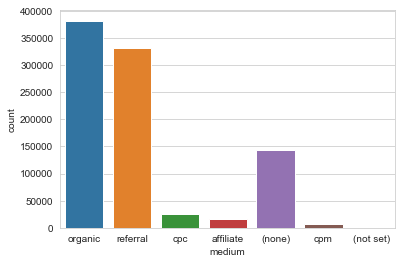

In [37]:
sns.countplot(TRAFF['medium'])